# 1. Descrição do problema

- O projeto em questão tem como objetivo principal estabelecer o preço de venda de uma casa com base em uma análise detalhada dos fatores que mais influenciam essa precificação. Em um mercado imobiliário dinâmico e competitivo, a definição precisa do valor de uma propriedade é crucial tanto para vendedores quanto para compradores. No entanto, o preço de venda de uma casa não é determinado por um único fator, mas sim por uma combinação de diversas variáveis que podem impactar significativamente o valor final.

- Diante disso, a primeira etapa do projeto consiste em identificar e entender as variáveis explicativas que afetam o preço de venda. Essas variáveis podem incluir características como a localização da casa, o número de quartos, o tamanho do lote, a idade do imóvel, e até mesmo fatores externos como a proximidade de escolas, centros comerciais, e transporte público.

- A análise dessas variáveis tem um duplo propósito: não apenas auxiliar na precificação de uma casa específica, mas também proporcionar insights valiosos sobre o comportamento do mercado imobiliário. Compreender o peso e o impacto de cada variável no preço de venda permitirá construir modelos preditivos mais precisos e, consequentemente, tomar decisões mais informadas durante as transações imobiliárias.

- Ao final do projeto, espera-se obter um modelo robusto que possa prever o preço de venda de uma casa com base nas características identificadas, além de fornecer uma compreensão clara sobre quais fatores desempenham os papéis mais significativos na definição desse valor. Isso possibilitará uma abordagem mais estratégica para a negociação de imóveis, beneficiando todas as partes envolvidas no processo.

# 2. EDA

In [30]:
import pandas as pd

In [31]:
dados = pd.read_csv('/content/Preços_de_casas.csv')
dados.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


#### 2.1 Descrição das variáveis

- **area_primeiro_andar:** Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.

- **existe_segundo_andar:** Esta variável é binária, indicando se a propriedade possui ou não um segundo andar. Pode ser representada como 1 para "sim" e 0 para "não".

- **area_segundo_andar:** Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.

- **quantidade_banheiros:** Indica o número total de banheiros na propriedade.

- **capacidade_carros_garagem:** Esta variável indica a capacidade da garagem da propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.

- **qualidade_da_cozinha_Excelente:** Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade. Neste caso, assume-se que se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.

- **preco_de_venda:** Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.

In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


#### Observação:

Note que são 1.438 casas diferentes, organizadas em 8 aspectos separados por colunas. Dessas 8 colunas, podemos identificar o ID (Id), ou seja, o identificador único de cada casa. Além disso, temos dados sobre:

- A área do primeiro andar (area_primeiro_andar);
- Se existe segundo andar nessa casa (existe_segundo_andar);
- Se existe qualquer área do segundo andar (area_segundo_andar);
- A quantidade de banheiros (quantidade_banheiros);
- A capacidade de carros na garagem (capacidade_carros_garagem);
- E a qualidade da cozinha (qualidade_da_cozinha_Excelente).


In [33]:
dados = dados.drop(columns='Id')
dados.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


#### 2.2 Correlação

Quais fatores estão relacionados ao preço da casa? Como é essa relação?

Com o coeficiente de Pearson nos permite medir a relação linear entre variáveis, oferecendo uma escala que caria de  -1 a 1, que interpretamos conforme sua intensidade e direção:

 - -1: correlação positiva perfeita perfeita: á medida que uma variável aumenta, a outra também aumenta.
 - 0: não há relação linear entre as variáveis.
 - 1: indica uma correlação negativa perfeita: á medida que uma variável aumenta, a outra também.


In [34]:
corr = dados.corr()
corr

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
area_primeiro_andar,1.000000,-0.376805,-0.253793,0.369368,0.481231,0.323496,0.616557
existe_segundo_andar,-0.376805,1.000000,0.917101,0.292780,-0.001284,-0.020045,0.138541
area_segundo_andar,-0.253793,0.917101,1.000000,0.412777,0.131938,0.025248,0.305311
quantidade_banheiros,0.369368,0.292780,0.412777,1.000000,0.409281,0.154102,0.563132
capacidade_carros_garagem,0.481231,-0.001284,0.131938,0.409281,1.000000,0.276759,0.640214
qualidade_da_cozinha_Excelente,0.323496,-0.020045,0.025248,0.154102,0.276759,1.000000,0.496223
preco_de_venda,0.616557,0.138541,0.305311,0.563132,0.640214,0.496223,1.000000


In [35]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


- Observação:

A que precisamos nos atentar com essa métrica? Há dois pontos principais:

1. A **intensidade**
2. E a **direção**

A intensidade está muito ligada à magnitude, isto é, ao número apresentado no retorno. Quanto maior esse número, mais correlacionada está a característica com o preço de venda.

Essa métrica varia entre -1 e 1. Portanto, quanto mais próximas desses extremos, mais correlacionadas estão as variáveis, isto é, os aspectos em análise.

Vamos pensar em algumas hipóteses antes de observarmos os números?

#### Formulando hipóteses

Uma primeira hipótese possível seria a seguinte:

- **Uma casa maior pode custar mais caro.**

A partir disso, podemos entender quão correlacionados esses fatores estão com essa métrica. Com o output dessa correlação em mãos, podemos focar na área do primeiro andar (area_primeiro_andar) em relação ao preço de venda (preco_de_venda).

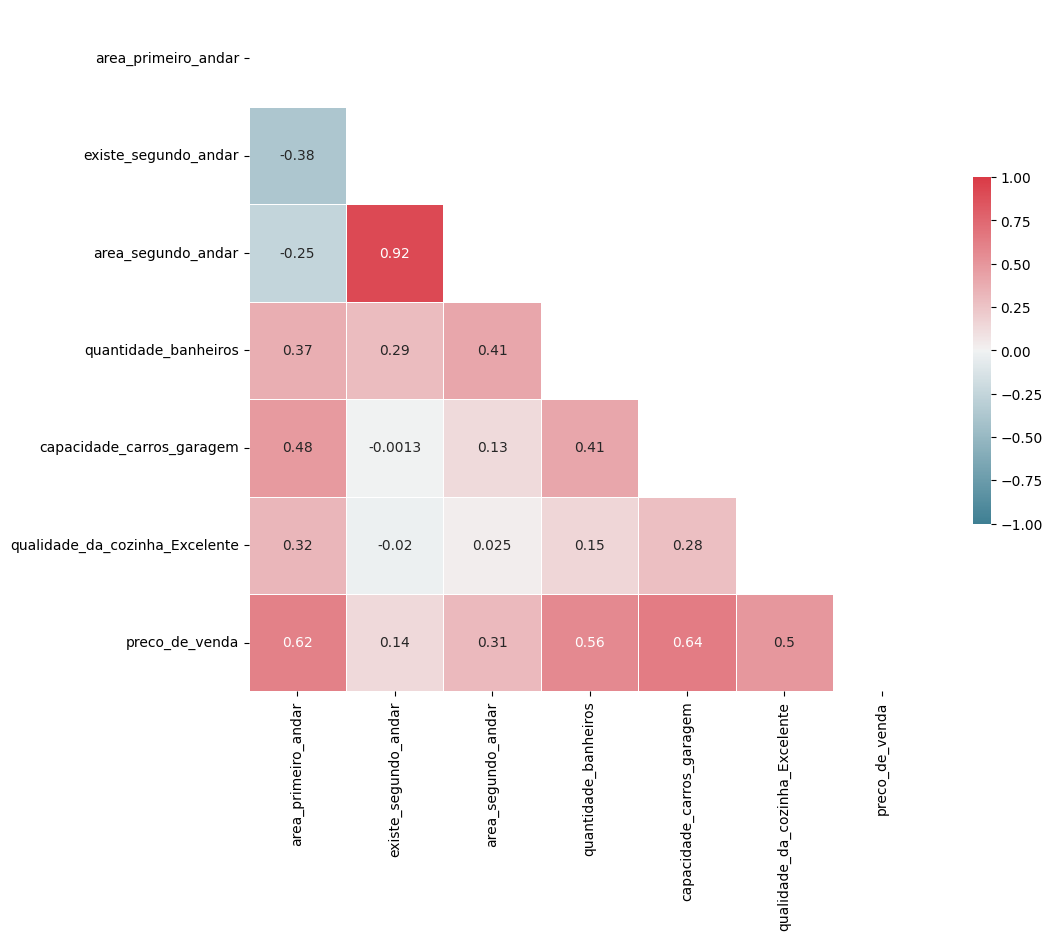

In [36]:
# Praticando o conceito de correlação
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

#### Sobre a correlação acima:

- Intensidade: refere-se à força da relação entre as variáveis medidas. Pode variar de -1 a +1, onde -1 indica uma correlação perfeitamente negativa, +1 indica uma correlação perfeitamente positiva e 0 indica ausência de correlação linear.

- Direção: refere-se à natureza da relação entre as variáveis medidas. Uma correlação positiva indica que as variáveis aumentam ou diminuem juntas, enquanto uma correlação negativa indica que uma variável aumenta enquanto a outra diminui, ou vice-versa.

**Exemplo**

O coeficiente de correlação linear entre a área do primeiro andar e o preço de venda é de 0.62, indicando uma correlação positiva moderadamente forte (intensidade). Em geral, à medida que a área do primeiro andar de uma casa aumenta, o preço de venda também tende a aumentar (direção).

#### 2.3 Relacionando variáveis

In [37]:
import plotly.express as px

Text(0, 0.5, 'Preço de venda')

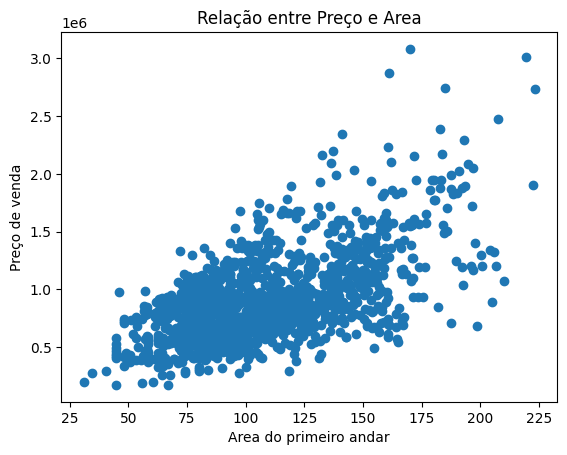

In [38]:
# Como é a relação entre área construída e o preço do imóvel?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")

**Sobre o gráfico acima:**

- Aparentemente, à medida que a área aumenta, o preço também aumenta. Talvez, para casas com uma área maior, os preços não estabeleçam uma relação tão linear, pois há uma explosão em determinado ponto do gráfico. Porém, essa relação linear ainda é visível.

Text(0, 0.5, 'Preço de venda')

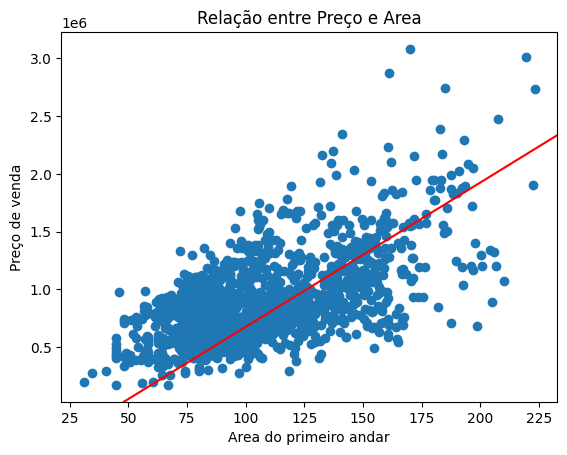

In [39]:
# Aparentemente, quanto maior a área do primeiro andar, maior o preço da casa.
# E se quisermos traçar uma linha que melhor representa esse comportamento?
plt.scatter(dados['area_primeiro_andar'], dados['preco_de_venda'])
plt.axline(xy1 = (66, 250000),xy2 = (190, 1800000), color = "red" )
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")

In [40]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados, x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override="red", trendline = 'ols' )

**Obtendo a melhor reta**



<ipython-input-41-ee018a4266f4>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




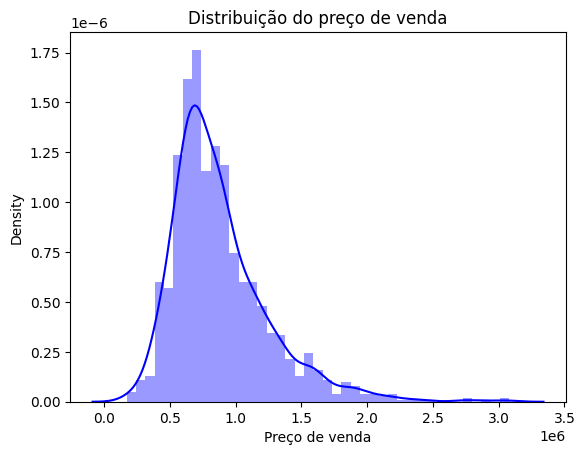

In [41]:
sns.distplot(dados['preco_de_venda'], kde=True, color='blue')
plt.title("Distribuição do preço de venda")
plt.xlabel("Preço de venda")
plt.show()

**Observação sobre o gráfico acima**

- A observação principal é que a maioria das casas tem um preço de venda de até 1 milhão, aproximadamente, com algumas casas mais caras, em menor quantidade, ultrapassando os 2 milhões. Esse padrão sugere uma distribuição com uma cauda mais longa à direita, como frequentemente descrevemos. É crucial compreender que essa variável é a nossa resposta principal, aquela que buscamos prever com precisão.


# 3. Separando em treino e teste

In [42]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [43]:
#Definindo y e X
y = dados['preco_de_venda']
X = dados.drop(columns = 'preco_de_venda')

In [44]:
#Aplicando o split do y ex
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

In [45]:
#Dados de treino para usar a fórmula
df_train = pd.DataFrame(data= X_train)
df_train['preco_de_venda'] = Y_train

In [47]:
from statsmodels.formula.api import ols

modelo_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()
modelo_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          2.22e-105
Time:                        00:46:30   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3.07e+04      4.981      0.000    9.27e+04    2.13e+05
area_primeiro_andar  6793.6416    275.455     24.663      0.000    6253.109    7334.175
==============================================================================
Omnibus:                      190.778   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.457
Skew:                           0.998   Prob(JB):                    1.72e-105
Kurtosis:                       5.743   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observações:**

- Dividi o conjunto de dados em duas partes: uma para treinamento e outra para teste. Essa abordagem visa garantir que nosso modelo de regressão, responsável por estabelecer a reta, não fique limitado a um único conjunto de dados, mas seja capaz de generalizar. Além disso, podemos avaliar a capacidade desse modelo de se generalizar para novos conjuntos, ou seja, ele não se restringe apenas às áreas específicas do primeiro andar presentes nos dados de treinamento.

#### 2.4 Analisando os coeficientes

(intensidade, direção e significância)

In [48]:
modelo_0.params

,0
Intercept,152909.288334
area_primeiro_andar,6793.641641


**Interpretação do intercepto**

- Mas e se a área do primeiro andar for zero? Ou seja, se não houver área construída no primeiro andar? Nesse caso, recorremos à interpretação do intercepto. Espera-se que, em média, uma casa sem área no primeiro andar tenha um preço de venda de R$ 152.909.

- Além do efeito quantitativo dos coeficientes, é importante observar também o sinal deles. No caso do efeito da área do primeiro andar, o sinal é positivo, indicando uma relação linear positiva. Isso significa que um aumento na área do primeiro andar contribui positivamente para o preço médio da casa.

In [49]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          2.22e-105
Time:                        00:49:44   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.529e+05   3

**Resumo**

- Entre essas informações, pode-se visualizar os efeitos, incluindo o intercepto e o coeficiente associado à área do primeiro andar. Além disso, temos acesso ao erro, ao valor de teste t e ao p-valor para a área do primeiro andar. Quando o p-valor é significativamente baixo, isso indica que a área do primeiro andar tem um impacto significativo no preço de venda da casa. Portanto, ao analisar os coeficientes, é importante considerar o sinal, a magnitude e a significância do efeito.

In [50]:
# observando o R²
modelo_0.rsquared

0.37728010994297867

**Interpretando o R²**

- O coeficiente R², também conhecido como coeficiente de determinação, retornou 0.37. Podemos interpretar isso como 37% da variação nos preços das casas sendo explicada pelo tamanho do primeiro andar. Isso representa uma quantidade significativa de explicação, mas há mais a ser analisado.

- Quanto mais próximo de 1 o valor de R², melhor é a explicabilidade do modelo. Então, apesar de termos 37% de explicação com apenas uma variável, é importante compreender que outros fatores podem influenciar os preços das casas.

**Próximos passos**

- Aproximadamente 62% da variação dos preços não está sendo explicada pelo tamanho do primeiro andar. Essa variação pode ser atribuída a outros fatores, como o número de banheiros ou quartos. Precisamos explorar essas variáveis para entender melhor o modelo.

#### 2.5 Obtendo os resíduos

In [51]:
# Quais são os resíduos
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


- Por exemplo, na observação 1.303 para uma casa, tivemos uma diferença de R$ 193.023,00 a menos em relação ao preço estimado. Isso significa que estamos precificando essa casa um pouco abaixo do valor real de venda.

#### 2.6 Distribuição dos resíduos

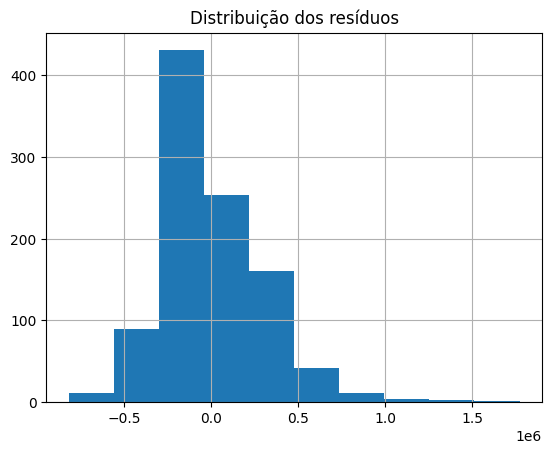

In [52]:
# Como eles estão distribuídos
modelo_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

**Sobre o gráfico acima**

- Ao observarmos o comportamento dos resíduos, percebemos que a maioria deles está próximo de zero, o que é desejável, pois indica que nosso modelo está cometendo menos erros.

- Para determinar se o modelo está bem ajustado, é importante que a distribuição dos resíduos siga uma forma de sino, conforme esperado pela teoria da regressão linear.

- Além disso, queremos que a maioria dos resíduos esteja concentrada em torno de zero, o que sugere que a diferença entre os valores observados e os valores estimados é pequena.

#### 2.7 Fazendo previsões

In [56]:
# importando o r2 score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# definindo o y previsto
y_predict = modelo_0.predict(X_test)

#printando o R²
print("R²: ", r2_score(y_test,y_predict))

R²:  0.386407235036864


**Conclusão**

- Já entendemos que o coeficiente de determinação (R²) está associado à explicabilidade do nosso modelo. Porém, é crucial realizar outra análise.

- Quando examinamos o R² entre os conjuntos y_test e y_predito - isto é, entre os valores observados e os valores previstos pelo modelo - esperamos que esse número seja similar ao R² obtido durante o treinamento.

- Ao voltarmos e verificarmos o R² do treinamento, que foi de 0.37, notamos que os valores de 0.37 e 0.38 estão bastante próximos. Isso sugere que o modelo está se comportando de maneira consistente tanto nos dados de treinamento quanto nos dados de teste.

- É fundamental lembrar que esse valor representa a proporção da variação nos preços das casas explicada pela área do primeiro andar, que é de aproximadamente 38%. No entanto, ainda restam 62% da variação que não é explicada por essa variável. Esses fatores não considerados precisarão ser adicionados ao nosso modelo para melhorar sua capacidade de previsão.

#### 2.8 Analisando os fatores

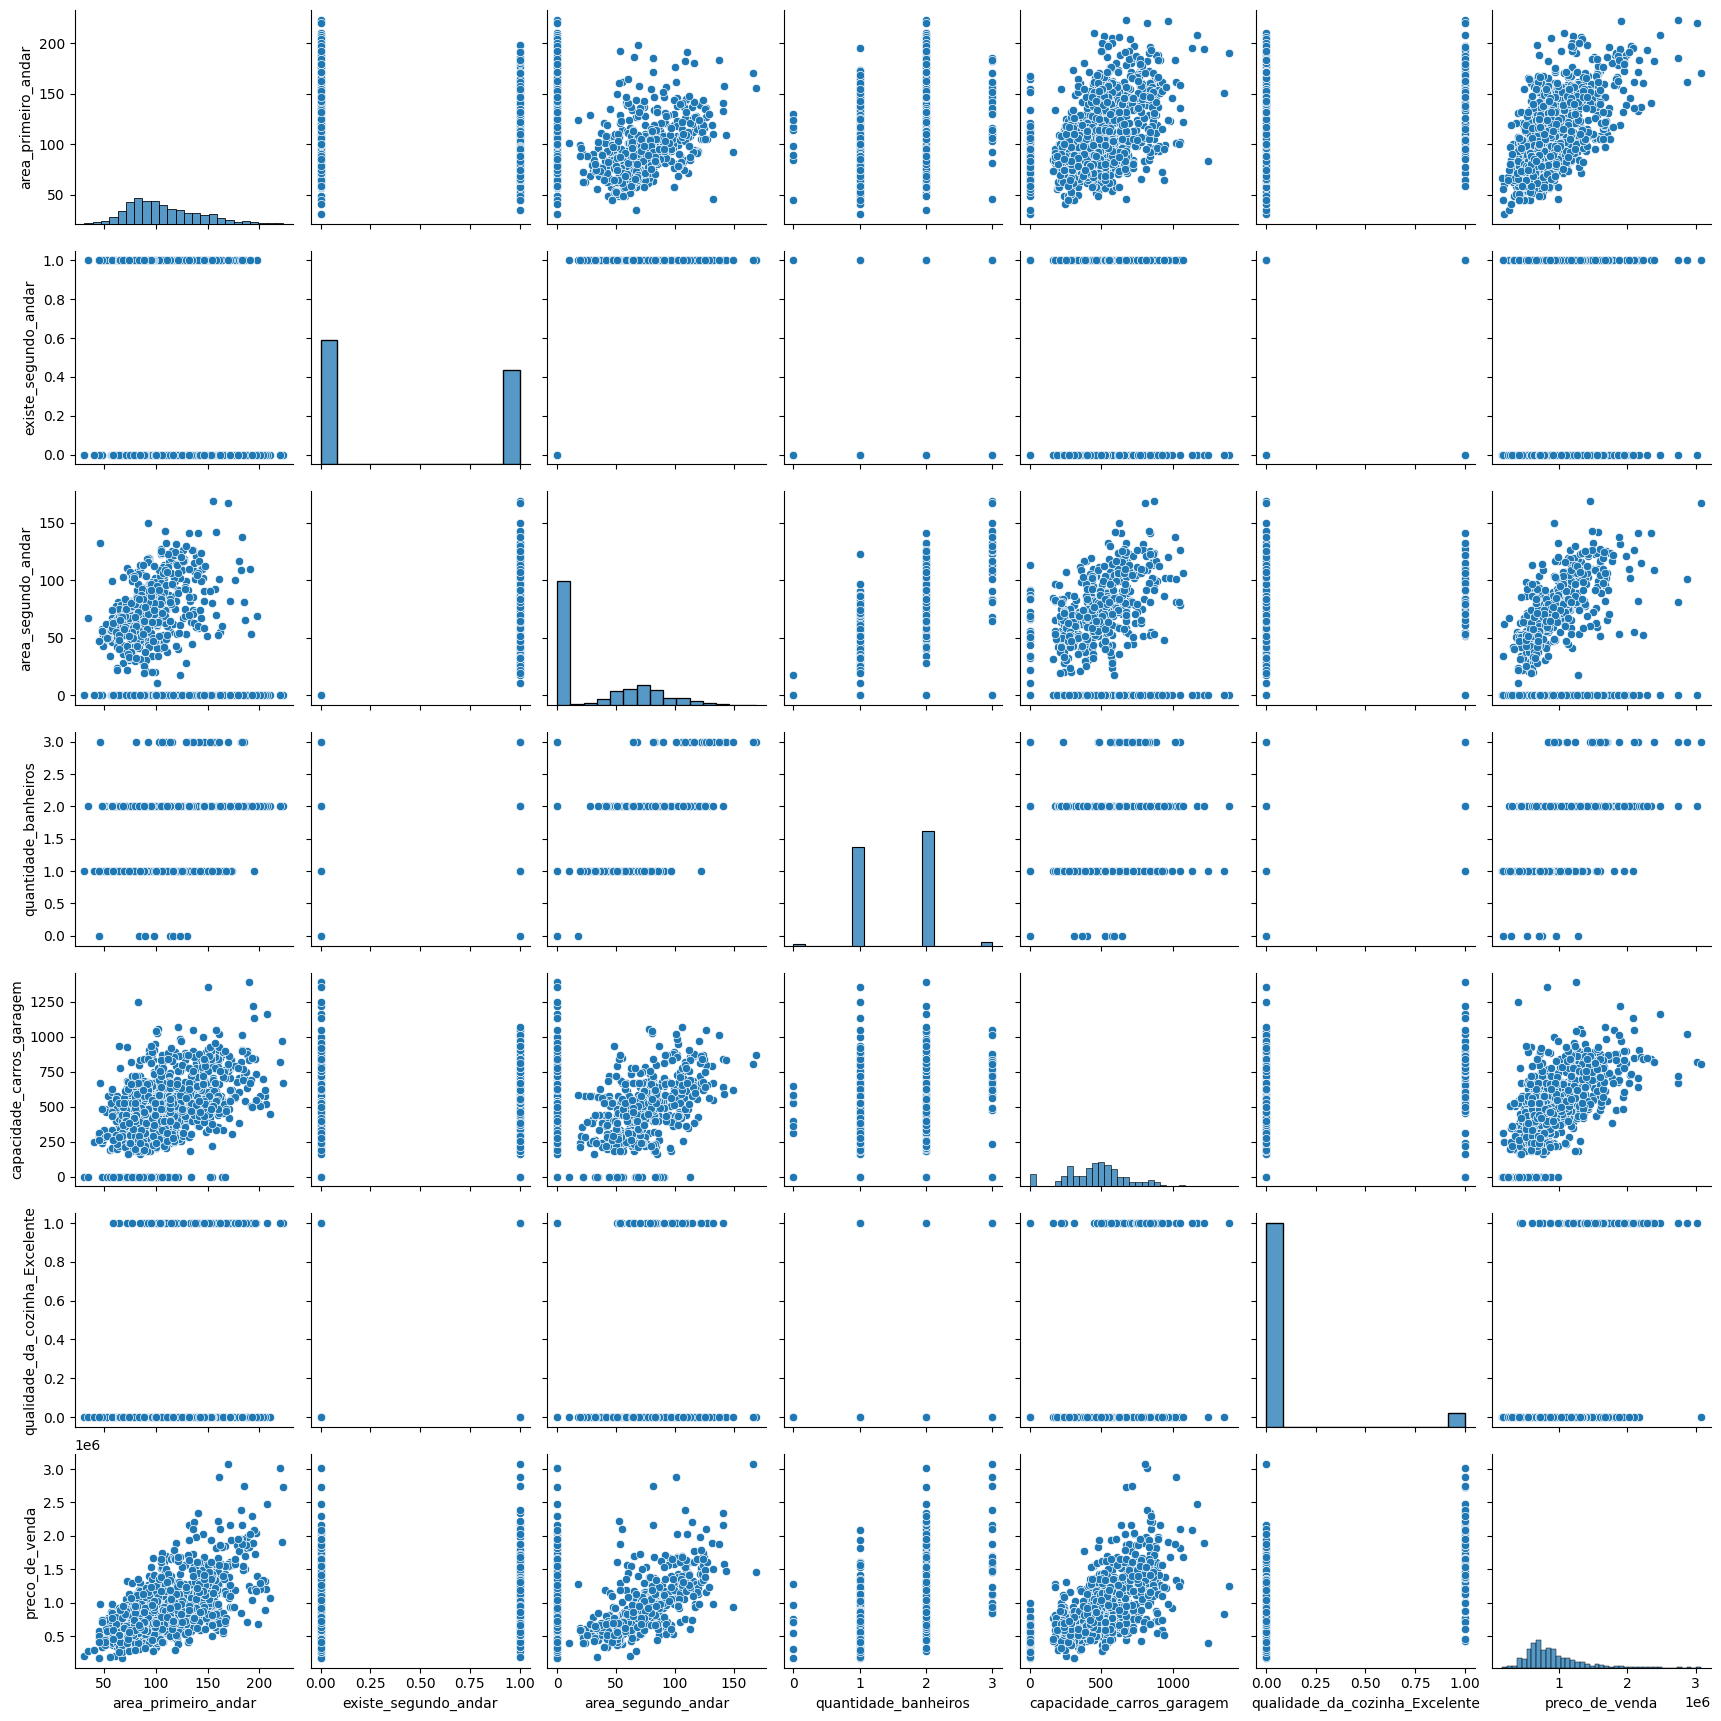

In [57]:
# quais outras características poderiam explicar o preço dos imóveis?
sns.pairplot(dados)

**Resumo**

- Ao observar o terceiro gráfico na primeira linha, que representa a área do primeiro andar, e descermos a visualização, veremos que ele se cruza com a terceira coluna, que representa a área do segundo andar. Ou seja, nesses cruzamentos temos todas as possibilidades de visualização entre uma variável e outra que está presente no conjunto de dados que carregamos.

In [58]:
dados.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente', 'preco_de_venda'],
      dtype='object')

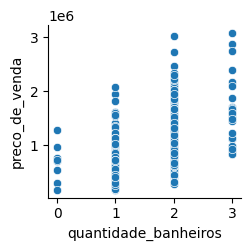

In [59]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = 'quantidade_banheiros')

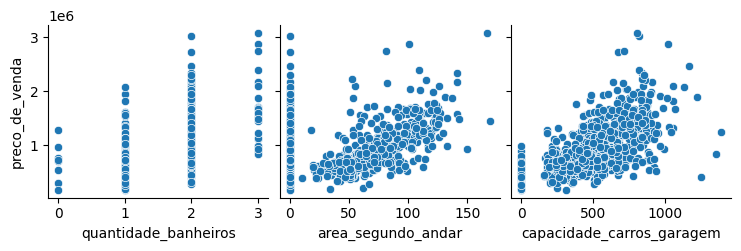

In [60]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(dados, y_vars = 'preco_de_venda', x_vars = ['quantidade_banheiros','area_segundo_andar','capacidade_carros_garagem'])

**Conclusão**

- Vemos que parece haver uma relação linear na area_segundo_andar, mas há várias casas que não têm o segundo andar. Também parece haver uma relação linear na capacidade_carros_garagem, só que alguns pontos fogem dessa relação. E também vemos que há algumas casas sem capacidade de ter carros na garagem.

- Essa é uma análise que podemos fazer para identificar outras variáveis que podem explicar o preço de venda da casa. Ou seja, o pairplot é uma ferramenta valiosa para visualizar a relação das variáveis, não só entre a variável resposta e outras candidatas explicativas, mas também a relação entre as explicativas.

- Essa ferramenta também nos auxilia a tomar a primeira decisão de incluir ou não determinados dados em um modelo.

#### 2.9 Ajustando Modelos

In [61]:
# importando a api do statsmodels
import statsmodels.api as sm

In [63]:
# adicionando o constante
X_train = sm.add_constant(X_train)
X_train.head()

,const,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente
538,1.0,76.6425,0,0.0,1,720,0
174,1.0,200.4782,0,0.0,2,576,0
1390,1.0,96.6160,0,0.0,2,420,0
303,1.0,185.8000,0,0.0,2,888,0
1128,1.0,120.5842,0,0.0,2,403,0


**Testando Modelos**

In [64]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'area_segundo_andar','quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [65]:
# Modelo sem a área do segundo andar
modelo_2 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros','capacidade_carros_garagem',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [66]:
# Modelo sem informações sobre garagem
modelo_3 = sm.OLS(y_train,
                  X_train[['const','area_primeiro_andar','existe_segundo_andar',
                          'quantidade_banheiros',
                           'qualidade_da_cozinha_Excelente']]).fit()

In [67]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     574.9
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        01:03:00   Log-Likelihood:                -15599.
No. Observations:                1150   AIC:                         3.121e+04
Df Residuals:                    1143   BIC:                         3.125e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [68]:
# Resumo do modelo 2
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     601.0
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          5.91e-317
Time:                        01:03:13   Log-Likelihood:                -15657.
No. Observations:                1150   AIC:                         3.133e+04
Df Residuals:                    1144   BIC:                         3.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [69]:
# Resumo do modelo 3
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     553.8
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          8.03e-266
Time:                        01:03:13   Log-Likelihood:                -15779.
No. Observations:                1150   AIC:                         3.157e+04
Df Residuals:                    1145   BIC:                         3.159e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Comparando os Modelos**

In [70]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.37728010994297867
Modelo 1:  0.7511266255520542
Modelo 2:  0.7242579094305015
Modelo 3:  0.6592403258722679


In [71]:
#Quantos parametros estão no modelo?
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
7
6
5


**Analisando os Efeitos das Variáveis**

In [72]:
modelo_3.params

,0
const,-148457.249598
area_primeiro_andar,6169.085417
existe_segundo_andar,222464.913109
quantidade_banheiros,158407.475244
qualidade_da_cozinha_Excelente,464714.788969


**Conclusão**

- Acessando esse resumo do modelo 3, podemos também verificar que todos os efeitos foram significativos, com um p-valor muito pequeno. Tudo isso está sendo significativamente bom para estabelecer o efeito que explica o preço da casa.

- Para analisar cada efeito, podemos observar a area_primeiro_andar, que analisamos no modelo zero. Ela informa que, ao aumentar 1 metro quadrado de área construída no primeiro andar, esperamos que o preço de venda aumente, em média, 6.119 reais. Esse é um efeito isolado, por isso, quando comparamos um modelo com mais de uma variável explicativa, todas as outras variáveis precisam estar constantes para que esse efeito seja interpretado dessa maneira.

- Vamos considerar outra explicação. Quando observamos a quantidade_banheiros, por exemplo, também temos um número bem grande, que é um efeito atrelado a essa variável. Esperamos, por exemplo, que quando construímos mais um banheiro, tenhamos um efeito de aumento do preço de venda da casa em 149.036 reais. Lembrando que todas as outras variáveis precisam estar constantes, porque esse efeito é isolado em relação à quantidade de banheiros.

- Além disso, no nosso modelo, temos duas variáveis categóricas: existe_segundo_andar — ou seja, se tem ou não um segundo andar — e qualidade_da_cozinha_Excelente — ou seja, se a cozinha é classificada como excelente ou não.

- Quando falamos sobre existe_segundo_andar, temos o valor de 221.306 reais, porque estamos falando sobre o preço de venda da casa. Mas essa interpretação está ligada à natureza dessa variável ser 0 ou 1, existindo ou não. Portanto, quando a casa tem um segundo andar, esperamos que o preço de venda daquela casa aumente, em média, 221.306 reais, em comparação àquela casa que não tem o segundo andar.

- Já quando observamos a qualidade_da_cozinha_Excelente, mantendo as outras variáveis constantes, também vamos comparar se a cozinha é classificada como excelente ou não. Assim, temos um efeito bem grande: se a cozinha é classificada como excelente, temos um aumento esperado do preço de venda daquela casa em 444.391 reais. Portanto, ter uma cozinha excelente na casa valoriza bem o preço de venda.

- Todos esses números ajudam a estabelecer o preço estimado de venda da casa. Além disso, é possível prever o melhor retorno financeiro de cada atributo da casa. No cenário de uma casa na qual temos o mesmo valor de custo para construir um segundo andar e para estabelecer uma cozinha excelente, por exemplo, podemos inferir que reformar a cozinha e deixá-la excelente tem maior retorno financeiro para o preço da casa do que construir um segundo andar, somente com base nesses coeficientes.

- Estamos falando de efeitos isolados, portanto, podemos analisá-los para entender o que mais valoriza o preço de venda da casa.

- A regressão linear sempre vai trazer um efeito isolado aos coeficientes. Por isso, a manter todas as variáveis constantes, temos o efeito da variável explicativa na variável resposta.

#### 2.10 Obtendo o R² da previsão

In [73]:
X_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [74]:
modelo_3.params

,0
const,-148457.249598
area_primeiro_andar,6169.085417
existe_segundo_andar,222464.913109
quantidade_banheiros,158407.475244
qualidade_da_cozinha_Excelente,464714.788969


In [75]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [76]:
# Prevendo com o modelo_3
predict_3 = modelo_3.predict(X_test[['const', 'area_primeiro_andar',
                   'existe_segundo_andar', 'quantidade_banheiros',
                   'qualidade_da_cozinha_Excelente' ]])

In [77]:
# Qual o R² da previsão?
modelo_3.rsquared

0.6592403258722679

In [78]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_3))

R²:  0.5932749007136005


**Conclusão**

- Após executar, obtemos um R² de 0,64. É normal que esse R², na base de teste, esteja um pouco menor.

- O que precisamos observar é que esses dois R² estejam bem parecidos, porque isso significará que ele tem uma capacidade de explicação parecida entre treino e teste.

# 3. Precificando uma casa

In [79]:
modelo_3.params

,0
const,-148457.249598
area_primeiro_andar,6169.085417
existe_segundo_andar,222464.913109
quantidade_banheiros,158407.475244
qualidade_da_cozinha_Excelente,464714.788969


In [80]:
novo_imovel = pd.DataFrame({'const':[1],
                            'area_primeiro_andar':[120],
                            'existe_segundo_andar': [1],
                            'quantidade_banheiros': [2],
                            'qualidade_da_cozinha_Excelente': [0]
                            })

In [81]:
# Qual o preço desse imóvel com o modelo_0?
modelo_0.predict(novo_imovel['area_primeiro_andar'])

,0
0,968146.285305


In [82]:
# Qual o preço desse imóvel com o modelo_3?
modelo_3.predict(novo_imovel)[0]

1131112.8640016485

**Conclusão**

- De uma forma mais técnica, o que estamos fazendo?

- O modelo de regressão estabelece uma fórmula. Estamos substituindo todos esses valores dentro da fórmula, e todos esses parâmetros estão multiplicando esses valores observados.

#### 3.1 Precificando várias casas

In [86]:
# Lendo várias casas
novas_casas = pd.read_csv("/content/Novas_casas.csv", sep=";")
novas_casas.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [87]:
novas_casas = novas_casas.drop(columns="Casa")

In [88]:
# Adicionando uma constante
novas_casas = sm.add_constant(novas_casas)
novas_casas.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [89]:
# Qual o preço dessas novas casas?
modelo_3.predict(novas_casas)

,0
0,1.780900e+06
1,1.901915e+06
2,1.595828e+06
3,2.247762e+06
4,1.620126e+06
5,1.254495e+06
6,1.375510e+06
7,1.562949e+06
8,9.703388e+05
9,1.659665e+06


#### 3.2 Identificand a presença de multicolinearidade

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
explicativas_1 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explicativas_2 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente']

explicativas_3 = ['const','area_primeiro_andar', 'existe_segundo_andar',
       'quantidade_banheiros', 'qualidade_da_cozinha_Excelente']

In [92]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = explicativas_1

vif_1["vif"] = [variance_inflation_factor(X_train[explicativas_1], i) for i in range(len(explicativas_1))]

In [93]:
vif_3 = pd.DataFrame()
vif_3["variavel"] = explicativas_3

vif_3["vif"] = [variance_inflation_factor(X_train[explicativas_3], i) for i in range(len(explicativas_3))]

In [94]:
y_previsto_train =  modelo_3.predict(X_train[explicativas_3])

In [95]:
fig = px.scatter(x=y_previsto_train, y=y_train,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [96]:
residuos = modelo_3.resid

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço da Casa - Previsão', ylabel='Resíduos'>

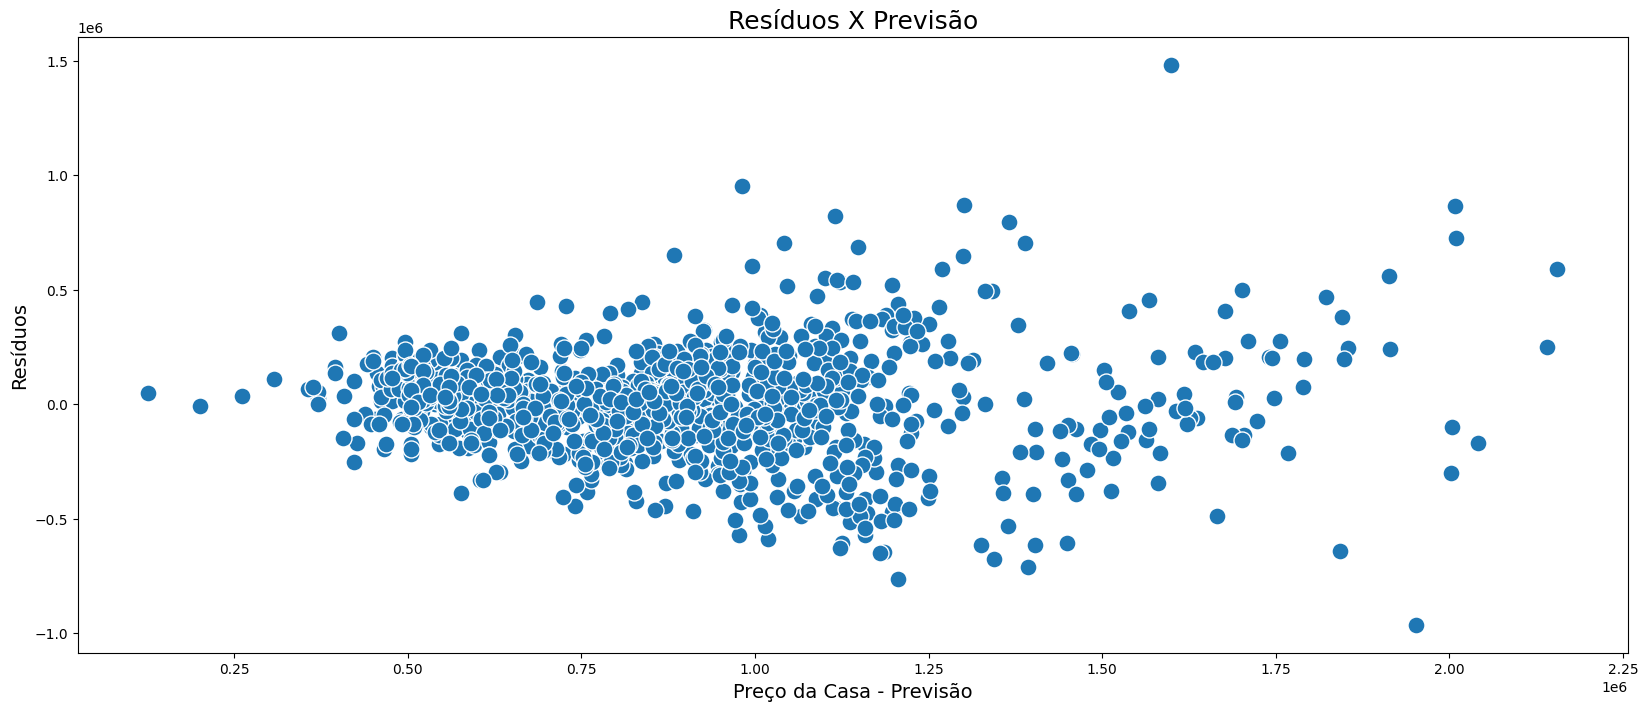

In [97]:
ax = sns.scatterplot(x=y_previsto_train, y=residuos, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço da Casa - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

**Conclusão**

- Quando olhamos para os resíduos, que estão no eixo Y, a maioria deles está em torno do zero. Isso é bom, porque queremos essa diferença entre o que observamos e o que estamos prevendo o mais próximo de zero possível.

- No entanto, vemos que, à medida que o preço da casa aumenta, essa distância fica maior, fica mais longe do zero, então, estamos errando mais. Foi exatamente essa conclusão que tiramos do outro gráfico, mas aqui temos mais liberdade para analisar esse gráfico.

- Esperamos que não exista um padrão nesse gráfico, porque, claramente, nas casas mais caras, estamos errando mais no preço delas, entre observar e precificar.

- Então, tem algum aspecto das variáveis explicativas que não está sendo incluído no modelo, principalmente para precificar casas mais caras.

- Quando fazemos um gráfico entre os preditos, o que estamos precificando com o nosso modelo, em relação aos resíduos, esperamos que esses pontos estejam dispostos de forma aleatória, sem um padrão, sem uma limitação no nosso modelo de regressão linear.

- Aqui, falamos sobre um conceito mais técnico. Quando temos de forma aleatória, chamamos isso de homoscedasticidade. Esse é um conceito que você vai encontrar nas literaturas quando está falando sobre regressão linear.

- Agora, o que não queremos que apareça no nosso modelo de regressão linear é justamente quando tem um padrão, ou seja, esses pontos não estão dispostos de forma aleatória em torno do zero.

- Nesses casos, a disposição dos pontos pelo gráfico pode formar uma parábola, o desenho de um cone, que é justamente o que vimos no nosso modelo. Quando estamos vendo um padrão desses pontos, chamamos isso de heteroscedasticidade. Então, não estamos vendo a presença da homoscedasticidade, que é o que queremos dentro do nosso modelo.

- Deixaremos uma atividade sobre todos os pontos que precisamos olhar quando estamos ajustando um modelo de regressão linear. São os pressupostos para ter um modelo de regressão linear bem assertivo, sem nenhuma limitação.

# 4. Salvando o modelo

In [101]:
import pickle

# Nome do arquivo onde o modelo será salvo
nome_arquivo = 'modelo_regressao_linear.pkl'

# Salvar o modelo em um arquivo usando pickle
try:
    with open(nome_arquivo, 'wb') as arquivo:
        pickle.dump(modelo_3, arquivo)
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print(f"Erro ao salvar o modelo: {e}")

Modelo salvo com sucesso!!!
